In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
file1 = open("../../data/features/2019_05_15_TSLA_y_05_yishuang.pickle",'rb')
tsla = pickle.load(file1, encoding='utf-8')

# design AR features

In [4]:
tsla.head(10)

,Date,Daily_volume,Datetime,Hour_volume,Trading_Hour,Roll_volume,Volume_perc
0,2016-05-24,3013800,2016-05-24 13:30:00+00:00,1088736.0,1,4155755.0,0.261983
1,2016-05-24,3013800,2016-05-24 14:30:00+00:00,565361.0,2,4042448.0,0.139856
2,2016-05-24,3013800,2016-05-24 15:30:00+00:00,282089.0,3,3723060.0,0.075768
3,2016-05-24,3013800,2016-05-24 16:30:00+00:00,267042.0,4,3550596.0,0.075210
4,2016-05-24,3013800,2016-05-24 17:30:00+00:00,145856.0,5,3181963.0,0.045838
5,2016-05-24,3013800,2016-05-24 18:30:00+00:00,266077.0,6,3115184.0,0.085413
6,2016-05-24,3013800,2016-05-24 19:30:00+00:00,324737.0,7,2939898.0,0.110459
7,2016-05-25,3126800,2016-05-25 13:30:00+00:00,772125.0,1,2623287.0,0.294335
8,2016-05-25,3126800,2016-05-25 14:30:00+00:00,706932.0,2,2764858.0,0.255685
9,2016-05-25,3126800,2016-05-25 15:30:00+00:00,271832.0,3,2754601.0,0.098683


In [5]:
tsla['Perc_shift_1'] = tsla['Volume_perc'].shift(1)
tsla['Perc_shift_2'] = tsla['Volume_perc'].shift(2)
tsla['Perc_shift_3'] = tsla['Volume_perc'].shift(3)
tsla['Perc_shift_4'] = tsla['Volume_perc'].shift(4)
tsla['Perc_shift_5'] = tsla['Volume_perc'].shift(5)
tsla['Perc_shift_6'] = tsla['Volume_perc'].shift(6)
tsla['Perc_shift_7'] = tsla['Volume_perc'].shift(7)

In [6]:
tsla.dropna(inplace = True)

In [7]:
tsla.head()

,Date,Daily_volume,Datetime,Hour_volume,Trading_Hour,Roll_volume,Volume_perc,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
7,2016-05-25,3126800,2016-05-25 13:30:00+00:00,772125.0,1,2623287.0,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
8,2016-05-25,3126800,2016-05-25 14:30:00+00:00,706932.0,2,2764858.0,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
9,2016-05-25,3126800,2016-05-25 15:30:00+00:00,271832.0,3,2754601.0,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
10,2016-05-25,3126800,2016-05-25 16:30:00+00:00,288918.0,4,2776477.0,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210
11,2016-05-25,3126800,2016-05-25 17:30:00+00:00,440561.0,5,3071182.0,0.143450,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838


In [8]:
ar = tsla[['Volume_perc','Perc_shift_1', 'Perc_shift_2', 'Perc_shift_3', 'Perc_shift_4', 'Perc_shift_5', 'Perc_shift_6', 'Perc_shift_7']]


In [9]:
ar.reset_index(drop = True, inplace = True)

In [10]:
ar.corr()

,Volume_perc,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
Volume_perc,1.000000e+00,6.745192e-05,-6.584832e-05,-4.137406e-07,-2.515432e-04,-8.490513e-05,-9.669110e-05,-4.345820e-05
Perc_shift_1,6.745192e-05,1.000000e+00,6.744999e-05,-6.585135e-05,-4.142882e-07,-2.515447e-04,-8.490840e-05,-9.669666e-05
Perc_shift_2,-6.584832e-05,6.744999e-05,1.000000e+00,6.744734e-05,-6.585203e-05,-4.158174e-07,-2.515483e-04,-8.491493e-05
Perc_shift_3,-4.137406e-07,-6.585135e-05,6.744734e-05,1.000000e+00,6.744621e-05,-6.585406e-05,-4.210764e-07,-2.515587e-04
Perc_shift_4,-2.515432e-04,-4.142882e-07,-6.585203e-05,6.744621e-05,1.000000e+00,6.744568e-05,-6.585517e-05,-4.229057e-07
Perc_shift_5,-8.490513e-05,-2.515447e-04,-4.158174e-07,-6.585406e-05,6.744568e-05,1.000000e+00,6.744289e-05,-6.586028e-05
Perc_shift_6,-9.669110e-05,-8.490840e-05,-2.515483e-04,-4.210764e-07,-6.585517e-05,6.744289e-05,1.000000e+00,6.743185e-05
Perc_shift_7,-4.345820e-05,-9.669666e-05,-8.491493e-05,-2.515587e-04,-4.229057e-07,-6.586028e-05,6.743185e-05,1.000000e+00


In [11]:
Trading_Hour = pd.get_dummies(data= tsla['Trading_Hour'], drop_first = True)

In [12]:
tsla_new = pd.concat([Trading_Hour, tsla], axis = 1)

In [13]:
tsla_new.head()

,2,3,4,5,6,7,Date,Daily_volume,Datetime,Hour_volume,Trading_Hour,Roll_volume,Volume_perc,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
7,0,0,0,0,0,0,2016-05-25,3126800,2016-05-25 13:30:00+00:00,772125.0,1,2623287.0,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
8,1,0,0,0,0,0,2016-05-25,3126800,2016-05-25 14:30:00+00:00,706932.0,2,2764858.0,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
9,0,1,0,0,0,0,2016-05-25,3126800,2016-05-25 15:30:00+00:00,271832.0,3,2754601.0,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
10,0,0,1,0,0,0,2016-05-25,3126800,2016-05-25 16:30:00+00:00,288918.0,4,2776477.0,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210
11,0,0,0,1,0,0,2016-05-25,3126800,2016-05-25 17:30:00+00:00,440561.0,5,3071182.0,0.143450,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838


In [14]:
tsla_new.rename(columns = {2:'Hour2', 3: 'Hour3', 4: 'Hour4', 5:'Hour5', 6:'Hour6', 7:'Hour7'}, inplace = True)


In [15]:
tsla_new.drop(['Trading_Hour'], axis = 1, inplace = True)

In [16]:
tsla_new.head()

,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Date,Daily_volume,Datetime,Hour_volume,Roll_volume,Volume_perc,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
7,0,0,0,0,0,0,2016-05-25,3126800,2016-05-25 13:30:00+00:00,772125.0,2623287.0,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
8,1,0,0,0,0,0,2016-05-25,3126800,2016-05-25 14:30:00+00:00,706932.0,2764858.0,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
9,0,1,0,0,0,0,2016-05-25,3126800,2016-05-25 15:30:00+00:00,271832.0,2754601.0,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
10,0,0,1,0,0,0,2016-05-25,3126800,2016-05-25 16:30:00+00:00,288918.0,2776477.0,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210
11,0,0,0,1,0,0,2016-05-25,3126800,2016-05-25 17:30:00+00:00,440561.0,3071182.0,0.143450,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838


In [17]:
tsla_new.reset_index(inplace = True, drop = True)

In [18]:
from pandas.plotting import autocorrelation_plot

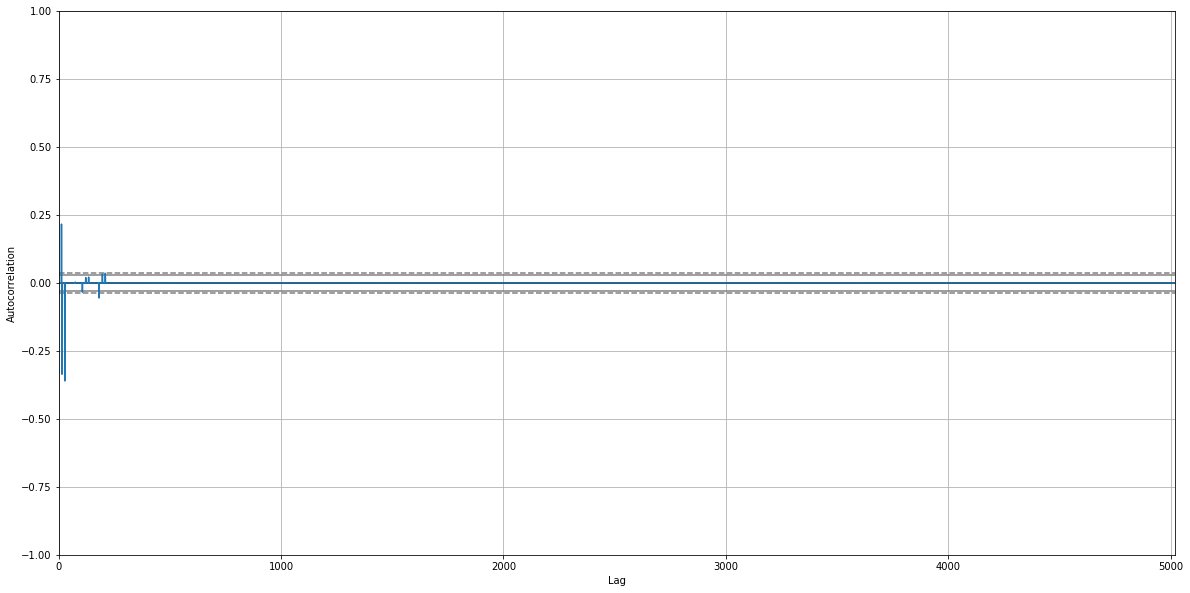

In [20]:
plt.figure(figsize=(20,10))
autocorrelation_plot(ar['Volume_perc'])

In [ ]:
!pip install statsmodels

In [21]:
from statsmodels.tsa.ar_model import AR

In [22]:
import statsmodels.api as sm

In [23]:
X = tsla_new[["Perc_shift_1", "Perc_shift_2", "Perc_shift_3", "Perc_shift_4", "Perc_shift_5", "Perc_shift_6", "Perc_shift_7",
         "Hour2", "Hour3", "Hour4", "Hour5", "Hour6", "Hour7"]]
y = tsla_new["Volume_perc"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Volume_perc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1210
Date:                Sat, 18 May 2019   Prob (F-statistic):               1.00
Time:                        03:45:28   Log-Likelihood:                -22639.
No. Observations:                5019   AIC:                         4.530e+04
Df Residuals:                    5006   BIC:                         4.539e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Perc_shift_1     0.0002      0.014      0.012      0.990      -0.028       0.028
Perc_shift_2 -9.358e-06      0.014     -0.001      0.999      -0.028       0.028
Perc_shift_3 -1.263e-05      0.014     -0.001      0.999      -0.028       0.028
Perc_shift_4    -0.0003      0.014     -0.019      0.985      -0.028       0.027
Perc_shift_5  -6.42e-05      0.014     -0.005      0.996      -0.028       0.028
Perc_shift_6  9.712e-05      0.014      0.007      0.995      -0.028       0.028
Perc_shift_7    -0.0004      0.014     -0.025      0.980      -0.028       0.027
Hour2            0.1625      0.823      0.197      0.844      -1.452       1.777
Hour3            0.1225      0.823      0.149      0.882      -1.492       1.737
Hour4            0.0013      0.823      0.002      0.999      -1.613       1.615
Hour5            0.0983      0.823      0.119      0.905      -1.516       1.712
Hour6            0.5240      0.823      0.636      0.525      -1.090       2.138
Hour7           -0.8604      0.823     -1.045      0.296      -2.474       0.754
==============================================================================
Omnibus:                    10186.240   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        868481577.693
Skew:                          15.226   Prob(JB):                         0.00
Kurtosis:                    2040.646   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

y1 = tsla["Percentage_Volume"]

ax.plot(y1, color = 'cornflowerblue')


plt.show()